# Diamond Price Prediction

**Diamond is the only gem made of a single element: It is typically about 99.95 percent carbon. The other 0.05 percent can include one or more trace elements.Diamonds were formed billions of years ago and are extremely rare because so few are able to survive the difficult journey from the pits of the earth to reach the earth's surface.**

## Aim of The Project
**Aim of the this project is to predict diamond price (target) with respect to predictor varaibles of given diamond data set.**


# Exploratory Data Analysis

In [57]:
#importing required data manupilation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv(r"C:\Users\ErkanCetinyamac\Desktop\Datasets\diamonds.csv") #reads the diamond data.

In [59]:
df.info() # our data set contains 8 numerical and 3 categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [60]:
df.shape # the data has 53940 rows of observations

(53940, 11)

In [61]:
df.columns # names of the features

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [62]:
df.head(10) # first look to the data. unnamed:0 column seems like unnecessary index. We might consider droping it. 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [63]:
df.describe().T # descriptive statistics of numerical features.
#price feature has huge difference of min and max values. There might be outliers.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [64]:
df.isna().sum() # there is no missing value in the data.

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

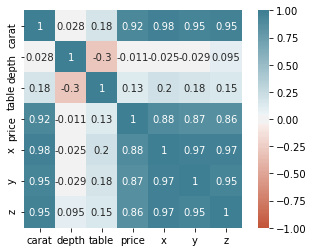

In [65]:
df.drop('Unnamed: 0',axis = 1, inplace = True) #  drop unnecessary index.
corr=df.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)

#Correlation table of numerical features.
#Strong correlation between carat and price draws attention .


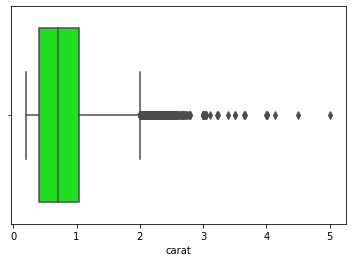

In [66]:
sns.boxplot(x="carat",data=df,color ="lime"); # box plot of carat feature. There are a lot of outliers.

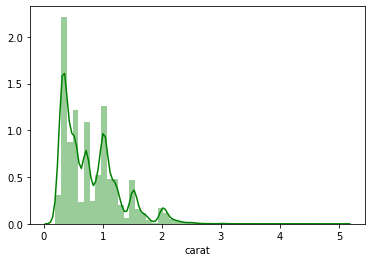

In [67]:
sns.distplot(df.carat, hist=True, kde=True,color = "green") #distribution plot of carat feature.
#The distribution is left skewed due to outliers.

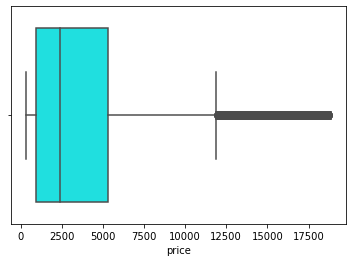

In [68]:
sns.boxplot(x="price",data=df,color ="cyan") # Price column also has many outliers.

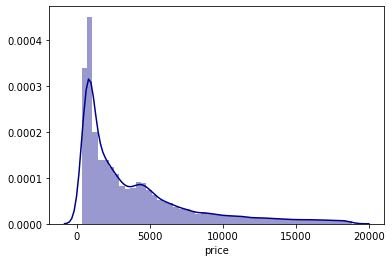

In [69]:
sns.distplot(df.price, hist=True, kde=True,color = "darkblue") # skewed to left as well.

In [71]:
df.cut.unique() # quality of the cut (Fair, Good, Very Good, Premium, Ideal) ordinal variable.

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [72]:
df.cut.value_counts() # count values of cut types.

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

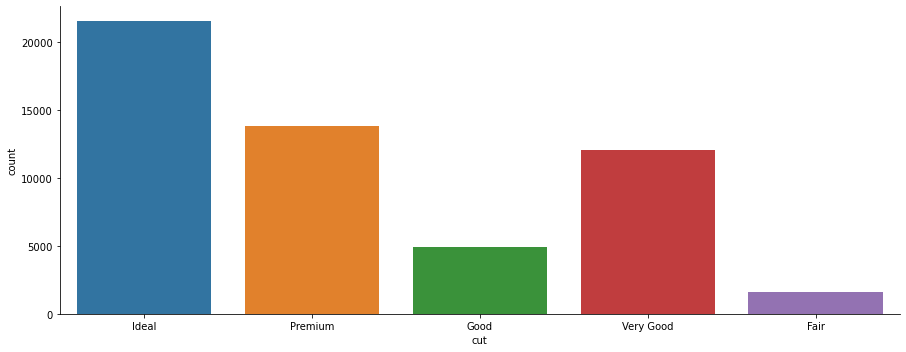

In [73]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 ) # bar plot of cut feature count.
#most of diamonds that in the data is ideal cut.

In [74]:
df.color.unique() # there are 7 different color of diamonds in the data.

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [75]:
df.color.value_counts() # value counts of color of diamonds.

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

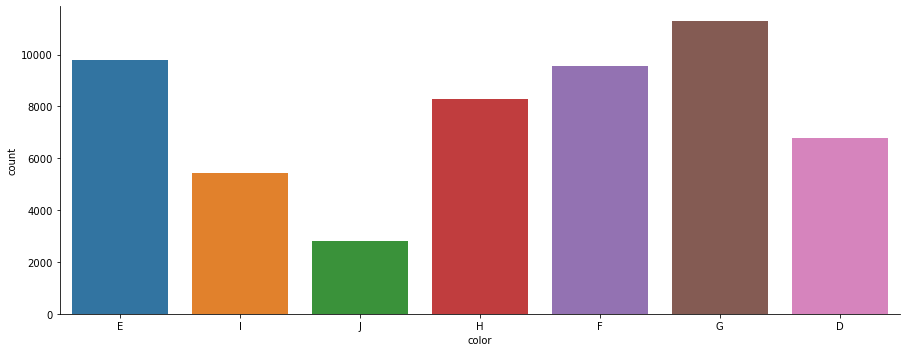

In [76]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )  #barplot of diamond colors. 
#color diamond from  D (best) to J (worst) 
# 'G' color is the most common type.


In [77]:
df.groupby('color').carat.mean() #grouping diamonds according to their colors then looking their carat means.


color
D    0.657795
E    0.657867
F    0.736538
G    0.771190
H    0.911799
I    1.026927
J    1.162137
Name: carat, dtype: float64

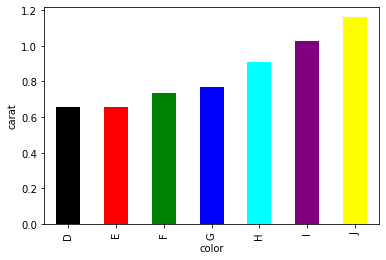

In [79]:
df.groupby('color').carat.mean().plot(kind = 'bar', 
                                      color=['black', 'red', 'green', 'blue', 'cyan','purple','yellow'],
                                      xlabel = 'color',
                                      ylabel="carat")
#bar plot of the carat means with respect to colors.

In [80]:
CutPrice = df.groupby('cut').price.mean()
CutPrice
#mean prices of cut types

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

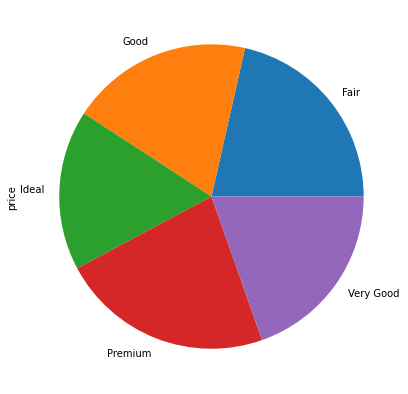

In [81]:
CutPrice.plot(kind='pie',figsize=(7,7)) #pie plot of mean prices of cut types
#Premium is the most high one.

# Outlier Elemination

**In order to determine outliers we use box plots to see from which point outlier observations starts.**

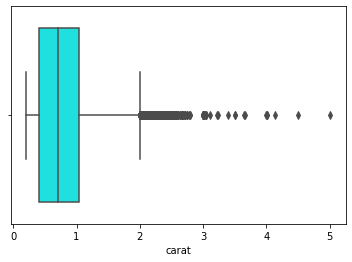

In [82]:
sns.boxplot(x="carat",data=df,color ="cyan")
# it seems like above of 3 value are outliers.

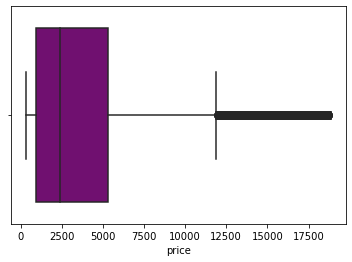

In [83]:
sns.boxplot(df.price,color ="purple")
#outliers of price column starts from 13000.

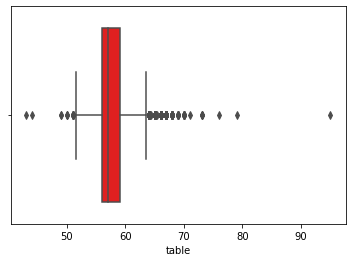

In [84]:
sns.boxplot(x="table",data=df,color ="red")
#outlier observation of table feature

In [86]:
#appyling outlier elemination by filtering data points
df = df[(df["price"]< 14500)]
df = df[(df["carat"]< 3)]
df = df[(df["table"]< 64)&(df["table"]>52)]

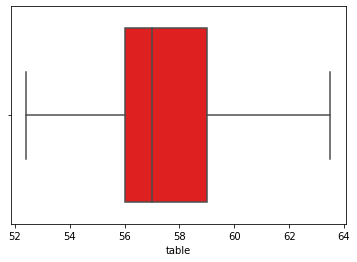

In [89]:
sns.boxplot(x="table",data=df,color ="red") # box plot of table column after outlier elemination

In [ ]:
diamond = df.copy() #copying the dataframe before categorical feature encoding.

# Categorical Feature Encoding

In [90]:
# We will use labelencoding to encode out categorical features.
from sklearn import preprocessing

label_cut = preprocessing.LabelEncoder()
label_color = preprocessing.LabelEncoder()
label_clarity = preprocessing.LabelEncoder()

#encoding all of categorical columns
diamond['cut'] = label_cut.fit_transform(diamond['cut'])
diamond['color'] = label_color.fit_transform(diamond['color'])
diamond['clarity'] = label_clarity.fit_transform(diamond['clarity'])

In [91]:
diamond.head(7) #Let's have a look to the data after encoding.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53


# Train - Validation Split

In [93]:
y = diamond['price'] #target variable

features = ['carat', 'cut', 'color', 'clarity',
            'depth', 'table', 'price'] #predictor variables

X = diamond[features]

In [94]:
from sklearn.model_selection import train_test_split 
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=2021) 

# Building Models

In [95]:
#importing standartizer and regression models and their error metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [96]:
# Building pipelines of different regressors and standartize the training set.

pipeLR= Pipeline([("std_scalar1",StandardScaler()),
                     ("lr_regressor",LinearRegression())])

pipeDT= Pipeline([("std_scalar2",StandardScaler()),
                     ("dt_regressor",DecisionTreeRegressor())])

pipeRF= Pipeline([("std_scalar3",StandardScaler()),
                     ("rf_regressor",RandomForestRegressor())])

pipeXGB= Pipeline([("std_scalar4",StandardScaler()),
                     ("XGB_regressorr",XGBRegressor())])

In [97]:
# List of all the pipelines
pipelines = [pipeLR, pipeDT, pipeRF, pipeXGB]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "XGBRegressor"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(train_X, train_y)

In [98]:
cv_results_NMSE = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model,train_X, train_y,scoring="neg_mean_squared_error", cv=10)
    cv_results_NMSE.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))
    
# negative root mean square error of linear regression and decision tree regressors are very low. This points to overfitting. 
# On the other hand XGB Regressor's error value appears to be optimal. Let's choose XGB regressor for our main model.

LinearRegression: -0.000000 
DecisionTree: -1.247049 
RandomForest: -0.425340 
XGBRegressor: -36.362155 


# Model Evaluation

In [99]:
# XGB Model predictions on validation data.
pred = pipeXGB.predict(val_X)

In [100]:
# Model Evaluation with different error metrics
print("R^2:",metrics.r2_score(val_y, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(val_y, pred))*(len(val_y)-1)/(len(val_y)-val_X.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(val_y, pred))
print("MSE:",metrics.mean_squared_error(val_y, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(val_y, pred)))

R^2: 0.9999969081882379
Adjusted R^2: 0.9999969067842365
MAE: 4.097038733544133
MSE: 31.919093950538546
RMSE: 5.649698571653053


# Conclusion

**In this project, the data is evaluated by means of their features in order to predict the diamond price. Before predicting the price, exploratory data analysis has been made, outliers eleminated, categorical features encoded and numerical features standartized.To predict the price; Linear Regression Model, Decision Tree Regressor, RandomForrest Regressor and XGB Regressor are compared. Amongst them The XGB Regressor has been the most successful one in order to predict diamond price.**